# COGS 108 - Data Checkpoint

## Authors

- Jason Oh: Conceptualization, Background research, Data curation, Writing – original draft
- Luca Georgescu: Analysis, Methodology, Software, Visualization, Data Wrangling
- Brendan Keane: Project administration, Analysis, Writing – review & editing, Visualization


## Research Question

To what extent do advanced college basketball efficiency metrics and player characteristics predict whether a player is selected in the NBA Draft?

The basketball efficiency metrics we are focusing on are:
- True Shooting Percentage (TS%)
- Box Plus Minus(BPM)

The player characteristics we are focusing on are:
- College Conference Affiliation
- College year

Draft selection will be operationalized as a binary outcome variable (1 = drafted, 0 = not drafted).



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Hypothesis


We hypothesize that higher True Shooting Percentage (TS%, defined as a player’s scoring efficiency accounting for field goals, three-pointers, and free throws) and BPM (Box Plus Minus) values are positively associated with NBA draft selection. Specifically, we expect that players with higher efficiency and overall impact metrics will have a greater probability of being drafted (Drafted = 1).

We believe TS% and BPM are particularly important because they capture overall scoring efficiency and a player’s total on-court impact, rather than raw scoring volume alone. Unlike traditional statistics that reflect usage or opportunity, efficiency-based metrics better account for shot quality, decision-making, and two-way contribution, which may be more indicative of NBA-ready performance. Additionally, we expect player characteristics such as position, and participation in higher-profile conferences to be positively associated with draft selection.

## Data

### Data overview

- Dataset Name: College Basketball Players 2009 – 2021
- Link to the dataset: https://www.kaggle.com/datasets/adityak2003/college-basketball-players-20092021
- Number of observations: The dataset contains 61,061 player-season observations from NCAA Division I men’s basketball between 2009 and 2021. Each row represents one player in one season.
- Number of variables: 65
- Variables most relevant to this project:
  - True Shooting Percentage (TS%): A scoring efficiency metric that accounts for field goals, three-point shots, and free throws. It is expressed as a proportion (typically between 0 and 1). Higher values indicate more efficient scoring performance.
  - Box Plus-Minus (BPM): An advanced metric estimating a player's overall contribution per 100 possessions relative to an average player. A value of 0 represents average impact, positive values indicate above-average performance, and negative values indicate below-average impact.
  - College Conference Affiliation: A categorical variable identifying the NCAA conference in which the player competed (e.g., ACC, SEC, Big Ten). Conference strength may influence visibility, level of competition, and draft exposure.
  - College Year (Class Year): A categorical variable indicating the player’s academic/eligibility year (Freshman, Sophomore, Junior, Senior). Underclassmen may have different draft probabilities due to perceived long-term potential.

- Description of shortcomings this dataset has with respect to the project:
  - The dataset is observational and does not include qualitative scouting information such as injury history, leadership ability, or work ethic, which may influence draft decisions.
  - Players appear multiple times across seasons, requiring us to restrict the analysis to each player’s final collegiate season to ensure independence.
  - Advanced metrics such as BPM or TS% may have missing values in some seasons, particularly in earlier years.
  - Draft outcomes are not included in this dataset and must be merged from a separate draft dataset.

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [7]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/COGS108/Group044_WI26/refs/heads/master/data/00-raw/CollegeBasketballPlayers2009-2021.csv', 'filename':'player_stats.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Successfully downloaded: player_stats.csv


### NCAA Division I Men's Basketball Player Dataset (2009-2021) #1 

#### Detailed Description of Dataset #1: College Basketball Players 2009–2021

The College Basketball Players 2009–2021 dataset contains season-level statistics for NCAA Division I men’s basketball players across multiple seasons. Each row represents one player in one season, and the dataset includes both traditional box-score statistics and advanced efficiency metrics. Because it includes all Division I players rather than only drafted athletes, it provides a comprehensive population from which draft outcomes can later be examined.

The most important variables for this project are True Shooting Percentage (TS%), Box Plus-Minus (BPM), college conference affiliation, and college year (class year).

- True Shooting Percentage (TS%) is an advanced scoring efficiency metric expressed as a proportion between 0 and 1 (sometimes displayed as a percentage). It accounts for two-point field goals, three-point field goals, and free throws, providing a more complete measure of scoring efficiency than field goal percentage alone. In NCAA basketball, average TS% values typically fall around 0.50–0.55. Values above 0.60 indicate highly efficient scoring, while values below 0.45 suggest poor efficiency. Because TS% adjusts for shot value and free-throw attempts, it better reflects shot selection and scoring effectiveness.

- Box Plus-Minus (BPM) is an advanced metric measured in estimated points per 100 possessions relative to an average NCAA player. A BPM of 0 represents average impact. Positive values indicate above-average overall contribution, while negative values indicate below-average impact. For example, a BPM of +5 suggests a strong impact player who significantly improves team performance, while a BPM of −3 indicates below-average contribution. BPM attempts to summarize a player’s total offensive and defensive impact using box-score statistics, making it useful for evaluating overall effectiveness rather than scoring volume alone.

- College Conference Affiliation is a categorical variable identifying the NCAA conference in which the player competed (e.g., ACC, SEC, Big Ten). Conference membership is not measured in numeric units but represents structural context. Players in higher-profile conferences may face stronger competition and receive greater national exposure, potentially influencing draft outcomes.

- College Year (Class Year) is a categorical variable (Freshman, Sophomore, Junior, Senior) representing a player’s eligibility level. This variable captures experience and development stage. Underclassmen (especially freshmen) may be drafted based on projected potential, while seniors may be evaluated differently due to age and perceived development ceiling.


#### Major Concerns and Limitations of the Dataset

Although this dataset is large and comprehensive, several concerns are relevant to this project:

First, the dataset is observational and purely quantitative. It does not include qualitative scouting evaluations such as leadership, defensive communication, athletic testing results, injury history, or personality assessments. NBA draft decisions rely heavily on these qualitative factors, meaning statistical performance alone may not fully explain draft outcomes.

Second, the dataset includes repeated observations for players across multiple seasons. Without proper filtering, this could violate independence assumptions. To address this, we will restrict the analysis to each player’s final collegiate season prior to draft eligibility.

Third, advanced metrics such as TS% and BPM may have missing values in certain seasons, particularly in earlier years where advanced tracking was less consistent. Missing data may not be random; for example, players with limited minutes may lack sufficient possessions for advanced metrics to be computed reliably.

Fourth, college performance statistics are influenced by team system, pace of play, coaching strategy, and conference strength. As a result, efficiency metrics may partially reflect contextual factors rather than pure individual ability.

Finally, because the dataset includes all Division I players, there may be substantial variability in playing time. Players with very limited minutes may exhibit extreme TS% or BPM values due to small sample sizes, which could create statistical outliers that require careful handling. Using the IQR method we decided on setting upper and lower fences for TS% and BPM in order to filter out any outliers. 



Tidyness Check:

Head of raw dataset:


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


Shape of raw dataset: (61061, 66)
Columns of raw dataset: Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

From this we can see that the raw dataset is overall tidy, especially regarding our columns of interest

Size of the dataset:
Rows: 61061
Columns: 66

,player_name,conf,TS_per,yr,bpm,drafted
0,DeAndrae Ross,SB,44.43,So,-4.995140,0
1,Pooh Williams,WAC,54.48,So,0.593024,0
2,Jesus Verdejo,BE,47.98,Sr,0.003161,0
3,Mike Hornbuckle,WCC,53.69,Sr,-0.977798,0
4,Anthony Brown,BW,54.31,Sr,-1.836060,0


Missingness Analysis

Total amount of missing data: 339
Missing data per column: 


yr             294
bpm             45
player_name      0
conf             0
TS_per           0
drafted          0
dtype: int64

The year column has the most missing data, so let's investigate if it is missing at random or missing systematically:


,TS_per,bpm,drafted
yr_missing,,,
0,47.698807,-2.509232,0.023615
1,23.898605,-9.632279,0.000000


All the numerical columns have pretty different average values depending on the missingness of year
We believe that this is due to the small number of missing values compared to the large number of non-missing values
So we conclude that the missingness of year is most likely random

To deal with this missingness we will drop rows which have any missing values across its columns
We chose the any method because many columns do not have any missing values
Outlier Analysis

The only columns which could have outliers are the numerical columns: TS_per & bpm
Let's plot histograms of each variable so we can visualize any outliers

TS Per & BPM Histograms are at the bottom of the output


<Axes: title={'center': 'Distribution of True Shooting Percentage'}, xlabel='TS_per', ylabel='Count'>

<Axes: title={'center': 'Distribution of Box Plus-Minus'}, xlabel='bpm', ylabel='Count'>

As we can see, TS_per and bpm both seem to have outliers
Now we will identify the outliers using the IQR method

Number of True Shooting Percentage outliers: 7147

Number of Box Plus-Minus outliers: 2826
Final Data Cleaning

Data Cleaning Steps:
Previous steps to simplify analysis: Drop rows with any nan values, find drafted value from pick, and filter to signficiant columns
1. Drop rows with outliers in TS-per or BPM
2. Turn year column into numerical data
3. For mutli-yeared players with multiple entries, only keep last year


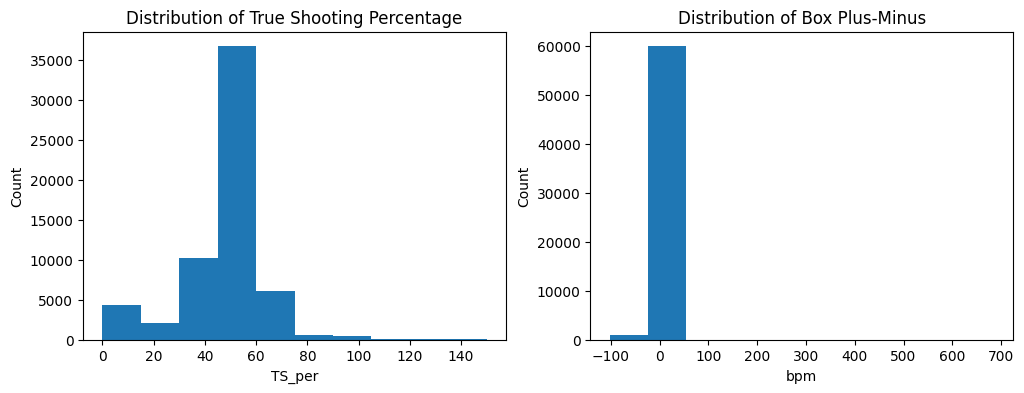

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load in data
data_path = 'data/00-raw/player_stats.csv'
raw_df = pd.read_csv(data_path)

# Show that the raw dataset is tidy
print("=======================================================================================================================")
print("Tidyness Check:\n")
print("Head of raw dataset:")
display(raw_df.head())
print(f"Shape of raw dataset: {raw_df.shape}")
print(f"Columns of raw dataset: {raw_df.columns}")

print("\nFrom this we can see that the raw dataset is overall tidy, especially regarding our columns of interest\n")
print("=======================================================================================================================")

print("Size of the dataset:")
print(f"Rows: {raw_df.shape[0]}")
print(f"Columns: {raw_df.shape[1]}")

# Choose significant columns that we will focus on for the rest of the dataset analysis
cleaned_df = raw_df[['player_name', 'conf', 'TS_per', 'yr', 'pick', 'bpm']]

# Create drafted column which contains 1 if player was drafted and 0 if not
# Draft status is determined from whether pick has a nan value or not
# This must be done before the rest of the analysis since the nan values in this column do not represent missing data, but instead not being drafted
cleaned_df['drafted'] = cleaned_df['pick'].apply(lambda x: 0 if np.isnan(x) else 1)
cleaned_df = cleaned_df.drop(columns=['pick'])

print("\nHead of cut dataset: (After filtering only columns of interest)")
display(cleaned_df.head())
print("=======================================================================================================================")
print("Missingness Analysis\n")

print(f"Total amount of missing data: {cleaned_df.isna().sum().sum()}")
print("Missing data per column: ")
display(cleaned_df.isna().sum().sort_values(ascending=False))
print("The year column has the most missing data, so let's investigate if it is missing at random or missing systematically:")
cleaned_df["yr_missing"] = cleaned_df["yr"].isna().astype(int)
display(cleaned_df.groupby("yr_missing")[['TS_per', 'bpm', 'drafted']].mean())
print("All the numerical columns have pretty different average values depending on the missingness of year")
print("We believe that this is due to the small number of missing values compared to the large number of non-missing values")
print("So we conclude that the missingness of year is most likely random\n")



# Drop any columns which have nan values in signficant columns
# Using 'any' method since if a player has any missing data then that players overall data is unusable
print("To deal with this missingness we will drop rows which have any missing values across its columns")
print("We chose the any method because many columns do not have any missing values")
cleaned_df = cleaned_df.dropna(how='any')

print("=======================================================================================================================")
print("Outlier Analysis\n")

print("The only columns which could have outliers are the numerical columns: TS_per & bpm")
print("Let's plot histograms of each variable so we can visualize any outliers\n")
fig, ax = plt.subplots(1, 2, figsize=(12,4))
print("TS Per & BPM Histograms are at the bottom of the output")
display(cleaned_df["TS_per"].plot(kind='hist', title='Distribution of True Shooting Percentage', xlabel="TS_per", ylabel="Count", ax=ax[0]))
display(cleaned_df["bpm"].plot(kind='hist', title='Distribution of Box Plus-Minus', xlabel="bpm", ylabel="Count"), ax=ax[1])

print("As we can see, TS_per and bpm both seem to have outliers")
print("Now we will identify the outliers using the IQR method")

# Identify outliers from True Shooting Percentage column using IQR method
ts_Q1 = cleaned_df['TS_per'].quantile(0.25)
ts_Q3 = cleaned_df['TS_per'].quantile(0.75)
ts_IQR = ts_Q3 - ts_Q1
ts_lowerfence = ts_Q1 - 1.5 * ts_IQR
ts_upperfence = ts_Q3 + 1.5 * ts_IQR
num_ts_outliers = len(cleaned_df[(cleaned_df['TS_per'] < ts_lowerfence) | (cleaned_df['TS_per'] > ts_upperfence)])
print(f"\nNumber of True Shooting Percentage outliers: {num_ts_outliers}")

# Identify outliers in Box Plus-Minus column using IQR method
bpm_Q1 = cleaned_df['bpm'].quantile(0.25)
bpm_Q3 = cleaned_df['bpm'].quantile(0.75)
bpm_IQR = bpm_Q3 - bpm_Q1
bpm_lowerfence = bpm_Q1 - 1.5 * bpm_IQR
bpm_upperfence = bpm_Q3 + 1.5 * bpm_IQR
num_bpm_outliers = len(cleaned_df[(cleaned_df['bpm'] < bpm_lowerfence) | (cleaned_df['bpm'] > bpm_upperfence)])
print(f"\nNumber of Box Plus-Minus outliers: {num_bpm_outliers}")

print("=======================================================================================================================")
print("Final Data Cleaning\n")

print("Data Cleaning Steps:")
print("Previous steps to simplify analysis: Drop rows with any nan values, find drafted value from pick, and filter to signficiant columns")
print("1. Drop rows with outliers in TS-per or BPM")
print("2. Turn year column into numerical data")
print("3. For mutli-yeared players with multiple entries, only keep last year")


# Filter out outlier values
cleaned_df = cleaned_df[(cleaned_df['TS_per'] > ts_lowerfence) & (cleaned_df['TS_per'] < ts_upperfence)]
cleaned_df = cleaned_df[(cleaned_df['bpm'] < bpm_lowerfence) & (cleaned_df['bpm'] < bpm_upperfence)]


# Players who have played multiple years will appear multiple times so we will only keep their last season
# We keep their last seasons since it will most likely be their best season or the season they are drafted

# Helper Function
def quantify_year(yr):
    if yr == 'Fr':
        return 1
    elif yr == 'So':
        return 2
    elif yr == 'Jr':
        return 3
    elif yr == 'Sr':
        return 4
    else:
        return np.nan

cleaned_df['yr_numerical'] = cleaned_df['yr'].apply(quantify_year)
cleaned_df = cleaned_df.loc[cleaned_df.groupby("player_name")["yr_numerical"].idxmax()]
cleaned_df = cleaned_df.reset_index(drop=True).drop(columns=['yr'])

# Reorder columns
cleaned_df = cleaned_df[['player_name', 'yr_numerical', 'conf', 'TS_per', 'bpm', 'drafted']]

In [75]:
# Final Cleaned Dataset:
print("Final Cleaned Dataset")
display(cleaned_df.head())
print(f"Final Dataset rows: {cleaned_df.shape[0]}")
print(f"Final Dataset columns: {cleaned_df.shape[1]}")

Final Cleaned Dataset


,player_name,yr_numerical,conf,TS_per,bpm,drafted
0,A.J. Rutter,3,MVC,42.86,-17.7316,0
1,Aaron Bowen,1,BE,30.77,-19.3693,0
2,Aaron Spivey,2,ACC,52.63,-15.9012,0
3,Abdullahi Mohamed,1,BSky,40.34,-18.9519,0
4,Abraham Millsap,3,OVC,33.33,-17.5159,0


Final Dataset rows: 501
Final Dataset columns: 6


## Ethics

Ethics Checklist:

A. Data Collection

☐ A.1 Informed consent

 This project does not involve direct interaction with human subjects or the collection of original data. All data used consists of publicly available college basketball statistics and NBA draft records, which were collected by third-party organizations for public use. As a result, informed consent from individual subjects is not applicable in this context.

☒ A.2 Collection bias

 The data used in this project may reflect bias introduced during data collection because college basketball statistics and NBA draft outcomes are shaped by unequal media exposure, conference visibility, and scouting attention. Players from major conferences or high-profile programs may receive more attention than equally skilled players from smaller schools. This project acknowledges that draft outcomes are not a purely objective measure of ability and may reflect these existing biases.

☒ A.3 Limit PII exposure

 This project uses only publicly available data and does not include sensitive or private personal information. Player attributes such as height, age, and position are already public and directly relevant to the analysis. No unnecessary personally identifiable information is collected or displayed.

☒ A.4 Downstream bias mitigation

 Although the project does not use protected group labels, it recognizes that draft outcomes may reflect border systemic inequities. The analysis avoids treating draft selection as a measure of intrinsic player value and explicitly frames findings as exploratory associations rather than normative judgements.

B. Data Storage

☒ B.1 Data security

 All datasets will be stored locally or in private course repositories and used only for this class project. Since the data is public and non-sensitive, security risks are minimal, but basic precautions such as restricted access and avoiding unnecessary data sharing will still be followed.

☒ B.2 Right to be forgotten

There is no mechanism for individual data removal. All data originate from publicly archived sources that are outside the control of the research team. 

☒ B.3 Data retention plan

The datasets will be retained only for the duration of the academic project. No long-term reuse or redistribution of the compiled dataset is planned beyond course requirements. 

C. Analysis

☒ C.1 Missing perspectives

 This analysis focuses on quantitative performance metrics and does not capture qualitative factors such as leadership, work ethic, injury history, or scouting evaluations. These missing perspectives are acknowledged, and results will be interpreted with the understanding that statistics alone do not fully explain NBA draft decisions.

☒ C.2 Dataset bias

 NBA draft outcomes may embed historical and structural biases related to visibility, playing style preferences, or organizational decision-making. The analysis will avoid treating draft position as an objective ground truth and will frame results as associations rather than definitive evaluations of player quality.

☒ C.3 Honest representation

 Visualizations and summary statistics will be designed to accurately reflect the data without exaggerating trends or implying causation. Any limitations or weak relationships observed will be clearly reported rather than omitted.

☒ C.4 Privacy in analysis

 No private or sensitive personal information is used or displayed in the analysis beyond what is necessary to answer the research question.

☒ C.5 Auditability

 The analysis will be documented in a Jupyter notebook with clear explanations of data sources, cleaning steps, and analysis decisions so that results can be reproduced or reviewed if questions arise later.

D. Modeling

☒ D.1 Proxy discrimination

 This project does not intentionally include variables that serve as proxies for protected characteristics. However, it acknowledges that some variables, such as conference or school, could indirectly reflect broader inequalities, and results will be interpreted cautiously.

☐ D.2 Fairness across groups

 Formal fairness testing is not conducted because the project does not involve high-stakes decision-making or protected group labels. This limitation is explicitly acknowledged.

☒ D.3 Metric selection

 Any models or regressions used are intended for exploratory analysis rather than optimization or decision-making. Metrics are chosen to understand relationships, not to rank or judge individual players.

☒ D.4 Explainability

 All modeling approaches used in this project will be simple and interpretable, making it clear how variables relate to draft outcomes.

☒ D.5 Communicate limitations

 The limitations and assumptions of the analysis will be clearly stated so results are not misunderstood or overgeneralized.

E. Deployment

☐ E.1 Monitoring and evaluation

 This project does not deploy a model or system in a real-world setting, so ongoing monitoring is not applicable.

☐ E.2 Redress

 Because the analysis is not used to make real decisions about individuals, there is no formal redress mechanism.

☐ E.3 Roll back

 The project does not involve deployment, so rollback procedures are not relevant.

☒ E.4 Unintended use

 There is a risk that readers could overinterpret the results as definitive evaluations of player potential. To reduce this risk, the project explicitly frames findings as exploratory and contextual rather than prescriptive.


## Team Expectations 

Team Expectation 1: Communication and Meetings

 Our team will primarily communicate through messages for quick updates and questions, and we will use email for more formal communication if needed. We expect responses within 24 hours during the week unless someone communicates otherwise. The team will meet at least once per week, either in person or virtually, to check in on progress, discuss difficulties, and plan next steps.

Team Expectation 2: Tone and Respectful Collaboration

 We agree to communicate in a respectful, direct, and constructive manner. Feedback should be honest but polite, with the goal of improving the project rather than criticizing individuals.

Team Expectation 3: Task Distribution and Accountability

 Work will be divided so that responsibilities are shared evenly across the project, with each member contributing to multiple aspects such as data collection, analysis, coding, and writing. Tasks and deadlines will be clearly assigned and tracked in a shared document so everyone can see progress. If someone is struggling to complete a task, they are expected to communicate this early so the team can adjust or provide support.

Team Expectation 4: Decision-Making Process

 Most decisions will be made through group discussion and consensus when possible. If a decision needs to be made quickly and not all members are available, the members present will move forward and update the rest of the team afterward. For technical or section-specific decisions, responsibility may be delegated to the member leading that part of the project.

Team Expectation 5: Handling Conflict and Team Issues

 If conflicts or concerns arise, we will address them directly and respectfully as a group rather than letting issues build up. If a team member consistently does not meet agreed upon expectations, the group will first communicate concerns clearly and give the member an opportunity to improve. If issues continue, we will follow the course policy and reach out to the instructor as needed.


## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| Week 6  | TBD  | Updated and refined project proposal; Begin data cleaning and wrangling; create initial summaries of key variables | Review data wrangling progress; identify missing values or issues; plan EDA visualizations |
| Week 7  | TBD  | Complete data wrangling; begin exploratory data analysis| Discuss EDA results; identify interesting patterns; decide which relationships to analyze further |
| Week 8  | TBD  | Continue analysis (correlations, regressions); draft results and discussion sections | Review analysis and interpretations; discuss limitations and ethical considerations |
| Week 9  | TBD  | Finalize analysis, visuals, and written sections; edit for clarity and consistency | Final review of full project; assign final edits and prepare for submission |
| Week 10  | TBD  | NA | Submit final notebook and complete group evaluations |

